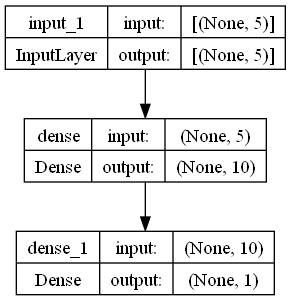

In [1]:
import pandas as pd
import numpy as np
import os
from random import shuffle
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
from keras.utils.vis_utils import plot_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import argparse
import locale
import os

seed = 246

# model-compile parameter sets
model_metrics = 'acc'
epochs = 300
batchs = 128
splits = 0.2
lr        = 1e-5
input_dim = 5
opt = Adam(learning_rate=lr,weight_decay=1e-5/128)

concatenated_df=pd.read_csv("extraFeatures_Geo.csv", header=None)
XY = concatenated_df.values
for i in range(10):
    np.random.shuffle(XY)
X = XY[:,[0,1,3,5,6,8,9]]## 'MPD','CBF','CUD','OEF','CUC','FLM','PPS','Label','tempRDCost','bestRDCost'
Y = XY[:,[7]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=splits, random_state=seed)
cost=x_train[:,[input_dim,input_dim+1]]
x_train=x_train[:,0:input_dim]
x_test=x_test[:,0:input_dim]

model = Sequential()
inputShape=(input_dim,)
model.add(Input(shape=inputShape))
x = Dense(10,activation="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(model.output)
x = Dense(1,activation ="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(x)
model = Model(inputs=[model.input],outputs=x)
model.compile(loss="mse",optimizer=opt,metrics=['acc'])

y_train_flatten = y_train.flatten()
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_flatten), y=y_train_flatten)
class_weights = dict(zip(np.unique(y_train_flatten),class_weights))
# cost_max = np.max(cost[:,0])
# cost_min = np.min(cost[:,0])
# cost_average = np.average(cost[:,0])
# sample_weightss = np.array((cost[:,0]-cost_min)/(cost_max-cost_min))
# sample_weightss = np.array(cost[:,0]/cost_average)
sample_num=np.size(y_train,0)
cost_sum=0
cost_num=0
cost_difference = []
for sample in np.concatenate([cost,y_train],axis=1):
    cost_difference_value = sample[0]-sample[1]
    if (sample[2]==0)&(cost_difference_value!=0):
        cost_difference.append(0)
    elif (sample[2]==0)&(cost_difference_value==0):
        cost_difference.append(1)
    elif (sample[2]==1)&(cost_difference_value<=0):
        cost_difference.append(0)
    else:
        cost_difference.append(cost_difference_value)
        cost_sum+=cost_difference_value
        cost_num+=1
sample_weights = np.array(cost_difference)
cost_average=cost_sum/cost_num
for i in range(sample_num):
    if (y_train[i]==1)&(sample_weights[i]!=0):
        sample_weights[i]=sample_weights[i]/cost_average
    if sample_weights[i]>1:
        sample_weights[i]=1
    elif sample_weights[i]<0:
        sample_weights[i]=0

plot_model(model,to_file='FeaturesPlots/model.png',show_shapes=True)

In [2]:
history = model.fit(x=[x_train],y=y_train, validation_data=([x_test], y_test), 
                    epochs=epochs, batch_size=batchs, class_weight=class_weights, sample_weight=sample_weights)

model.save_weights(r'revision/geo_model_allFeatures_withsamplewight.h5')
eval_model=[]
eval_model.append(model.evaluate([x_test], y_test)[1])
print("\nTest Accuracy: %.4f" % eval_model[0])

Epoch 1/300
15354/15354 [==============================] - 18s 1ms/step - loss: 0.1925 - acc: 0.6941 - val_loss: 0.2073 - val_acc: 0.6940
Epoch 2/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.1639 - acc: 0.7103 - val_loss: 0.1660 - val_acc: 0.8205
Epoch 3/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.1208 - acc: 0.9292 - val_loss: 0.1217 - val_acc: 0.9210
Epoch 4/300
15354/15354 [==============================] - 18s 1ms/step - loss: 0.0825 - acc: 0.9195 - val_loss: 0.0901 - val_acc: 0.9186
Epoch 5/300
15354/15354 [==============================] - 19s 1ms/step - loss: 0.0586 - acc: 0.9168 - val_loss: 0.0723 - val_acc: 0.9149
Epoch 6/300
15354/15354 [==============================] - 20s 1ms/step - loss: 0.0459 - acc: 0.9147 - val_loss: 0.0631 - val_acc: 0.9156
Epoch 7/300
15354/15354 [==============================] - 20s 1ms/step - loss: 0.0391 - acc: 0.9166 - val_loss: 0.0576 - val_acc: 0.9175
Epoch 8/300
15354/15354 [=========

15354/15354 [==============================] - 19s 1ms/step - loss: 0.0225 - acc: 0.9438 - val_loss: 0.0437 - val_acc: 0.9436
Epoch 61/300
15354/15354 [==============================] - 19s 1ms/step - loss: 0.0225 - acc: 0.9438 - val_loss: 0.0437 - val_acc: 0.9436
Epoch 62/300
15354/15354 [==============================] - 19s 1ms/step - loss: 0.0225 - acc: 0.9438 - val_loss: 0.0437 - val_acc: 0.9436
Epoch 63/300
15354/15354 [==============================] - 19s 1ms/step - loss: 0.0225 - acc: 0.9438 - val_loss: 0.0437 - val_acc: 0.9436
Epoch 64/300
15354/15354 [==============================] - 18s 1ms/step - loss: 0.0225 - acc: 0.9438 - val_loss: 0.0437 - val_acc: 0.9436
Epoch 65/300
15354/15354 [==============================] - 19s 1ms/step - loss: 0.0225 - acc: 0.9438 - val_loss: 0.0437 - val_acc: 0.9436
Epoch 66/300
15354/15354 [==============================] - 18s 1ms/step - loss: 0.0225 - acc: 0.9438 - val_loss: 0.0437 - val_acc: 0.9437
Epoch 67/300
15354/15354 [==============

Epoch 119/300
15354/15354 [==============================] - 19s 1ms/step - loss: 0.0225 - acc: 0.9439 - val_loss: 0.0438 - val_acc: 0.9437
Epoch 120/300
15354/15354 [==============================] - 18s 1ms/step - loss: 0.0225 - acc: 0.9439 - val_loss: 0.0438 - val_acc: 0.9437
Epoch 121/300
15354/15354 [==============================] - 18s 1ms/step - loss: 0.0225 - acc: 0.9439 - val_loss: 0.0438 - val_acc: 0.9437
Epoch 122/300
15354/15354 [==============================] - 18s 1ms/step - loss: 0.0225 - acc: 0.9439 - val_loss: 0.0438 - val_acc: 0.9437
Epoch 123/300
15354/15354 [==============================] - 18s 1ms/step - loss: 0.0225 - acc: 0.9439 - val_loss: 0.0438 - val_acc: 0.9437
Epoch 124/300
15354/15354 [==============================] - 18s 1ms/step - loss: 0.0225 - acc: 0.9439 - val_loss: 0.0438 - val_acc: 0.9437
Epoch 125/300
15354/15354 [==============================] - 19s 1ms/step - loss: 0.0225 - acc: 0.9439 - val_loss: 0.0438 - val_acc: 0.9437
Epoch 126/300
15354/

15354/15354 [==============================] - 18s 1ms/step - loss: 0.0225 - acc: 0.9439 - val_loss: 0.0437 - val_acc: 0.9437
Epoch 236/300
15354/15354 [==============================] - 18s 1ms/step - loss: 0.0225 - acc: 0.9439 - val_loss: 0.0437 - val_acc: 0.9437
Epoch 237/300
15354/15354 [==============================] - 19s 1ms/step - loss: 0.0225 - acc: 0.9439 - val_loss: 0.0437 - val_acc: 0.9437
Epoch 238/300
15354/15354 [==============================] - 18s 1ms/step - loss: 0.0225 - acc: 0.9439 - val_loss: 0.0437 - val_acc: 0.9437
Epoch 239/300
15354/15354 [==============================] - 18s 1ms/step - loss: 0.0225 - acc: 0.9439 - val_loss: 0.0437 - val_acc: 0.9437
Epoch 240/300
15354/15354 [==============================] - 18s 1ms/step - loss: 0.0225 - acc: 0.9439 - val_loss: 0.0437 - val_acc: 0.9437
Epoch 241/300
15354/15354 [==============================] - 19s 1ms/step - loss: 0.0225 - acc: 0.9439 - val_loss: 0.0437 - val_acc: 0.9437
Epoch 242/300
15354/15354 [=======

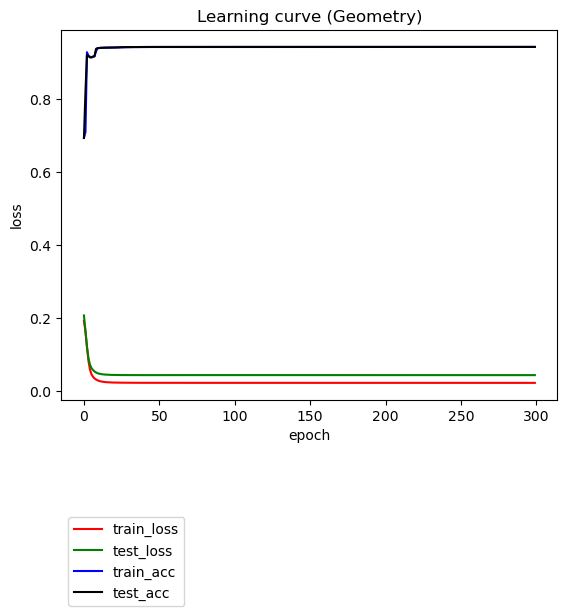

In [3]:
plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='g')
plt.plot(history.history['acc'],color='b')
plt.plot(history.history['val_acc'],color='k')
plt.title('Learning curve (Geometry)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss','train_acc', 'test_acc'], loc='upper left',bbox_to_anchor=(0,-0.3))
plt.savefig('FeaturesPlots/P_GeoTrainingCurve.jpg', bbox_inches='tight', dpi=1280)
plt.show()

import pickle
with open('revision/geo_model_allFeatures_withsamplewight.txt', 'wb') as file_txt:
    pickle.dump(history.history, file_txt)

In [4]:
np.set_printoptions(suppress=True)

a_weight1=model.get_weights()[0]
a_bias1=model.get_weights()[1]
a_weight2=model.get_weights()[2]
a_bias2=model.get_weights()[3]
# a_weight3=model.get_weights()[4]
# a_bias3=model.get_weights()[5]


print("\na_weight1: ")
for a in a_weight1:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias1: ")
for a in a_bias1:
        print(a,end=",")
        
print("\n\na_weight2: ")
for a in a_weight2:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias2: ")
for a in a_bias2:
        print(a,end=",")

# print("\n\na_weight3: ")
# for a in a_weight3:
#     for b in a:
#         print(b,end=",")
        
# print("\n\na_bias3: ")
# for a in a_bias3:
#         print(a,end=",")
        
# g_weight1=model.get_layer(index=0).get_weights()
# g_weight2=model.get_layer(index=1).get_weights()
        
# print(g_weight1)
# print(g_weight2)


a_weight1: 
-0.5900826,0.7789073,-0.4631772,0.61461014,-0.53145254,-0.5777704,0.48389786,-0.55607945,-0.54800445,-0.8040239,-1.3920724,1.4705355,-1.3641691,1.4304916,-1.1559026,-1.2960557,1.1264307,-1.3811178,-1.2470144,-1.6135243,-0.6770284,0.37193444,-0.7469931,0.53114384,-0.69298416,-0.6536249,0.6097996,-0.6379087,-0.6672146,-0.30642352,0.25087065,0.64150006,0.014606831,0.13603075,-0.7911398,-0.5421696,0.71801656,-0.5175149,-0.5473345,-1.193361,-1.1423151,0.6231394,-0.69070995,0.9008047,-0.13089076,-0.36864397,0.29351252,-0.343208,-0.32308143,-0.23717588,

a_bias1: 
1.6562462,-1.5034757,1.5847926,-1.6831235,1.6409048,1.6651386,-1.6707897,1.6391828,1.6021428,1.6246109,

a_weight2: 
-2.24646,2.220489,-2.1966429,2.3298783,-2.08547,-2.1216617,2.2567475,-2.1332924,-2.0517242,-2.2700918,

a_bias2: 
0.8758933,

In [5]:
# import numpy as np
# from keras.layers import Dense, Dropout
# from keras.models import Sequential, load_model
# import tensorflow.compat.v1 as tf
# inp_num = 6

# mmodel = Sequential()
# mmodel.add(Dense(10, input_dim=inp_num, activation='sigmoid'))
# mmodel.add(Dense(1,activation='sigmoid'))
# mmodel.compile(loss='mean_squared_error', optimizer='Adam', metrics=['acc'])
# # mmodel.add(Dense(3, activation='softmax'))
# # mmodel.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), optimizer='Adam', metrics=['acc'])
# mmodel.load_weights(r'weightANDlearningcurve/geo_model.h5')

# data=np.array([0,0,1,1,0,0]).reshape(1,-1)
# print(mmodel.predict(data))

Epoch 1/300
15354/15354 [==============================] - 18s 1ms/step - loss: 0.1926 - acc: 0.6939 - val_loss: 0.2107 - val_acc: 0.6952
Epoch 2/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.1660 - acc: 0.7407 - val_loss: 0.1721 - val_acc: 0.9331
Epoch 3/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.1245 - acc: 0.9232 - val_loss: 0.1282 - val_acc: 0.9164
Epoch 4/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0863 - acc: 0.9166 - val_loss: 0.0950 - val_acc: 0.9164
Epoch 5/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0616 - acc: 0.9055 - val_loss: 0.0757 - val_acc: 0.9019
Epoch 6/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0484 - acc: 0.9026 - val_loss: 0.0660 - val_acc: 0.9019
Epoch 7/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0415 - acc: 0.9097 - val_loss: 0.0601 - val_acc: 0.9096
Epoch 8/300
15354/15354 [=========

15354/15354 [==============================] - 17s 1ms/step - loss: 0.0248 - acc: 0.9395 - val_loss: 0.0442 - val_acc: 0.9393
Epoch 61/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0248 - acc: 0.9395 - val_loss: 0.0442 - val_acc: 0.9393
Epoch 62/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0248 - acc: 0.9395 - val_loss: 0.0442 - val_acc: 0.9393
Epoch 63/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0248 - acc: 0.9395 - val_loss: 0.0442 - val_acc: 0.9393
Epoch 64/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0248 - acc: 0.9395 - val_loss: 0.0442 - val_acc: 0.9393
Epoch 65/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0248 - acc: 0.9395 - val_loss: 0.0442 - val_acc: 0.9393
Epoch 66/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0248 - acc: 0.9395 - val_loss: 0.0442 - val_acc: 0.9393
Epoch 67/300
15354/15354 [==============

Epoch 119/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0247 - acc: 0.9395 - val_loss: 0.0442 - val_acc: 0.9393
Epoch 120/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0247 - acc: 0.9395 - val_loss: 0.0442 - val_acc: 0.9393
Epoch 121/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0247 - acc: 0.9395 - val_loss: 0.0442 - val_acc: 0.9393
Epoch 122/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0247 - acc: 0.9395 - val_loss: 0.0442 - val_acc: 0.9393
Epoch 123/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0247 - acc: 0.9395 - val_loss: 0.0442 - val_acc: 0.9393
Epoch 124/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0247 - acc: 0.9395 - val_loss: 0.0442 - val_acc: 0.9393
Epoch 125/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0247 - acc: 0.9395 - val_loss: 0.0442 - val_acc: 0.9393
Epoch 126/300
15354/

15354/15354 [==============================] - 17s 1ms/step - loss: 0.0247 - acc: 0.9395 - val_loss: 0.0442 - val_acc: 0.9393
Epoch 236/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0247 - acc: 0.9395 - val_loss: 0.0442 - val_acc: 0.9393
Epoch 237/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0247 - acc: 0.9395 - val_loss: 0.0442 - val_acc: 0.9393
Epoch 238/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0247 - acc: 0.9395 - val_loss: 0.0442 - val_acc: 0.9393
Epoch 239/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0247 - acc: 0.9395 - val_loss: 0.0442 - val_acc: 0.9393
Epoch 240/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0247 - acc: 0.9395 - val_loss: 0.0442 - val_acc: 0.9393
Epoch 241/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0247 - acc: 0.9395 - val_loss: 0.0442 - val_acc: 0.9393
Epoch 242/300
15354/15354 [=======

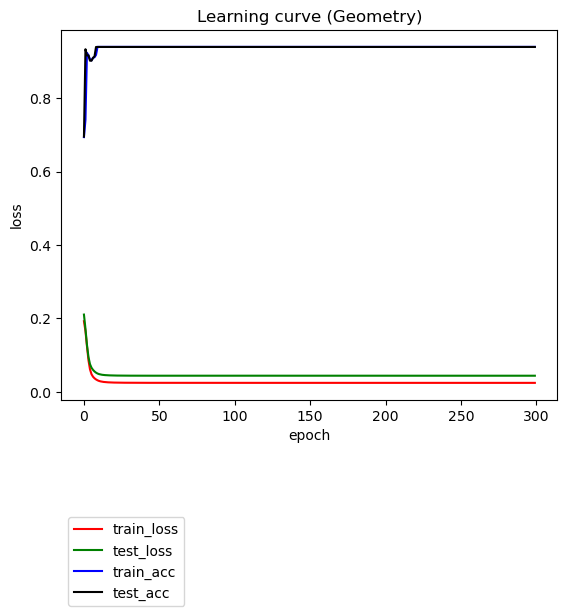


a_weight1: 
-1.295844,1.3716305,1.3321664,1.393904,-1.4477409,-1.323191,1.4139165,-1.4675984,-1.4067535,-1.3292463,-0.5681114,0.58752114,0.529029,0.5821765,-0.47258282,-0.5157724,0.67310834,-0.52774096,-0.62607235,-0.2996048,-0.3328491,0.36658266,0.35701987,0.19911233,-0.5073847,-0.504685,0.4718681,-0.37416187,-0.2105338,-0.8085013,-0.51572084,0.43326953,0.5570538,0.5566771,-0.42532703,-0.44409978,0.23457359,-0.3621828,-0.48899382,-0.46569726,

a_bias1: 
1.6089115,-1.6476921,-1.6667804,-1.56918,1.664113,1.6818275,-1.7179482,1.4694169,1.5863576,1.6095641,

a_weight2: 
-2.1504588,1.9929075,2.0707831,1.9701425,-2.1256924,-2.1027968,2.0485156,-2.0112967,-2.0997527,-2.011014,

a_bias2: 
0.2057041,

In [6]:
import pandas as pd
import numpy as np
import os
from random import shuffle
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
from keras.utils.vis_utils import plot_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import argparse
import locale
import os

seed = 246

# model-compile parameter sets
model_metrics = 'acc'
epochs = 300
batchs = 128
splits = 0.2
lr        = 1e-5
input_dim = 4
opt = Adam(learning_rate=lr,weight_decay=1e-5/128)

concatenated_df=pd.read_csv("extraFeatures_Geo.csv", header=None)
XY = concatenated_df.values
for i in range(10):
    np.random.shuffle(XY)
X = XY[:,[1,3,5,6,8,9]]## 'MPD','CBF','CUD','OEF','CUC','FLM','PPS','Label','tempRDCost','bestRDCost'
Y = XY[:,[7]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=splits, random_state=seed)
cost=x_train[:,[input_dim,input_dim+1]]
x_train=x_train[:,0:input_dim]
x_test=x_test[:,0:input_dim]

model = Sequential()
inputShape=(input_dim,)
model.add(Input(shape=inputShape))
x = Dense(10,activation="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(model.output)
x = Dense(1,activation ="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(x)
model = Model(inputs=[model.input],outputs=x)
model.compile(loss="mse",optimizer=opt,metrics=['acc'])

y_train_flatten = y_train.flatten()
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_flatten), y=y_train_flatten)
class_weights = dict(zip(np.unique(y_train_flatten),class_weights))
# cost_max = np.max(cost[:,0])
# cost_min = np.min(cost[:,0])
# cost_average = np.average(cost[:,0])
# sample_weightss = np.array((cost[:,0]-cost_min)/(cost_max-cost_min))
# sample_weightss = np.array(cost[:,0]/cost_average)
sample_num=np.size(y_train,0)
cost_sum=0
cost_num=0
cost_difference = []
for sample in np.concatenate([cost,y_train],axis=1):
    cost_difference_value = sample[0]-sample[1]
    if (sample[2]==0)&(cost_difference_value!=0):
        cost_difference.append(0)
    elif (sample[2]==0)&(cost_difference_value==0):
        cost_difference.append(1)
    elif (sample[2]==1)&(cost_difference_value<=0):
        cost_difference.append(0)
    else:
        cost_difference.append(cost_difference_value)
        cost_sum+=cost_difference_value
        cost_num+=1
sample_weights = np.array(cost_difference)
cost_average=cost_sum/cost_num
for i in range(sample_num):
    if (y_train[i]==1)&(sample_weights[i]!=0):
        sample_weights[i]=sample_weights[i]/cost_average
    if sample_weights[i]>1:
        sample_weights[i]=1
    elif sample_weights[i]<0:
        sample_weights[i]=0

history = model.fit(x=[x_train],y=y_train, validation_data=([x_test], y_test), 
                    epochs=epochs, batch_size=batchs, class_weight=class_weights, sample_weight=sample_weights)

model.save_weights(r'revision/geo_model_noMPD_withsamplewight.h5')
eval_model=[]
eval_model.append(model.evaluate([x_test], y_test)[1])
print("\nTest Accuracy: %.4f" % eval_model[0])

plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='g')
plt.plot(history.history['acc'],color='b')
plt.plot(history.history['val_acc'],color='k')
plt.title('Learning curve (Geometry)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss','train_acc', 'test_acc'], loc='upper left',bbox_to_anchor=(0,-0.3))
plt.savefig('FeaturesPlots/P_GeoTrainingCurve.jpg', bbox_inches='tight', dpi=1280)
plt.show()

import pickle
with open('revision/geo_model_noMPD_withsamplewight.txt', 'wb') as file_txt:
    pickle.dump(history.history, file_txt)
    
np.set_printoptions(suppress=True)

a_weight1=model.get_weights()[0]
a_bias1=model.get_weights()[1]
a_weight2=model.get_weights()[2]
a_bias2=model.get_weights()[3]
# a_weight3=model.get_weights()[4]
# a_bias3=model.get_weights()[5]


print("\na_weight1: ")
for a in a_weight1:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias1: ")
for a in a_bias1:
        print(a,end=",")
        
print("\n\na_weight2: ")
for a in a_weight2:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias2: ")
for a in a_bias2:
        print(a,end=",")

Epoch 1/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.1951 - acc: 0.6719 - val_loss: 0.2124 - val_acc: 0.6950
Epoch 2/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.1777 - acc: 0.6939 - val_loss: 0.1840 - val_acc: 0.6950
Epoch 3/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.1502 - acc: 0.7095 - val_loss: 0.1504 - val_acc: 0.7582
Epoch 4/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.1183 - acc: 0.8645 - val_loss: 0.1194 - val_acc: 0.9161
Epoch 5/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0903 - acc: 0.9157 - val_loss: 0.0968 - val_acc: 0.9127
Epoch 6/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0703 - acc: 0.9048 - val_loss: 0.0832 - val_acc: 0.9021
Epoch 7/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0580 - acc: 0.9044 - val_loss: 0.0763 - val_acc: 0.9043
Epoch 8/300
15354/15354 [=========

15354/15354 [==============================] - 17s 1ms/step - loss: 0.0398 - acc: 0.9153 - val_loss: 0.0671 - val_acc: 0.9157
Epoch 61/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0398 - acc: 0.9153 - val_loss: 0.0671 - val_acc: 0.9157
Epoch 62/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0398 - acc: 0.9153 - val_loss: 0.0671 - val_acc: 0.9159
Epoch 63/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0398 - acc: 0.9154 - val_loss: 0.0671 - val_acc: 0.9161
Epoch 64/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0398 - acc: 0.9155 - val_loss: 0.0672 - val_acc: 0.9157
Epoch 65/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0398 - acc: 0.9154 - val_loss: 0.0671 - val_acc: 0.9159
Epoch 66/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0398 - acc: 0.9155 - val_loss: 0.0671 - val_acc: 0.9161
Epoch 67/300
15354/15354 [==============

Epoch 119/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0397 - acc: 0.9162 - val_loss: 0.0670 - val_acc: 0.9166
Epoch 120/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0397 - acc: 0.9162 - val_loss: 0.0670 - val_acc: 0.9166
Epoch 121/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0397 - acc: 0.9162 - val_loss: 0.0670 - val_acc: 0.9166
Epoch 122/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0397 - acc: 0.9162 - val_loss: 0.0670 - val_acc: 0.9166
Epoch 123/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0397 - acc: 0.9162 - val_loss: 0.0670 - val_acc: 0.9166
Epoch 124/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0397 - acc: 0.9162 - val_loss: 0.0670 - val_acc: 0.9166
Epoch 125/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0397 - acc: 0.9162 - val_loss: 0.0670 - val_acc: 0.9166
Epoch 126/300
15354/

15354/15354 [==============================] - 17s 1ms/step - loss: 0.0392 - acc: 0.9197 - val_loss: 0.0658 - val_acc: 0.9201
Epoch 236/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0392 - acc: 0.9197 - val_loss: 0.0658 - val_acc: 0.9201
Epoch 237/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0391 - acc: 0.9197 - val_loss: 0.0658 - val_acc: 0.9201
Epoch 238/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0391 - acc: 0.9197 - val_loss: 0.0658 - val_acc: 0.9201
Epoch 239/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0391 - acc: 0.9197 - val_loss: 0.0658 - val_acc: 0.9201
Epoch 240/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0391 - acc: 0.9197 - val_loss: 0.0658 - val_acc: 0.9201
Epoch 241/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0391 - acc: 0.9197 - val_loss: 0.0658 - val_acc: 0.9202
Epoch 242/300
15354/15354 [=======

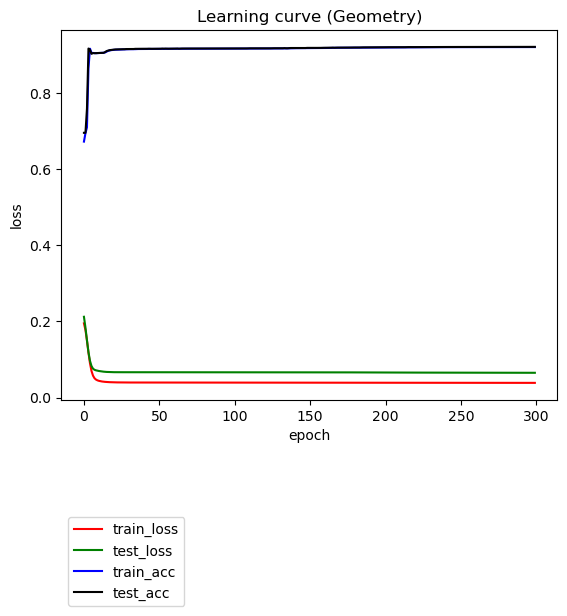


a_weight1: 
-0.82856274,-1.421014,2.096789,-2.469351,-2.014434,-2.5727239,-1.87438,-1.2982218,-0.604569,-2.2587905,-0.5897007,-1.0283772,1.4987825,-1.4566293,-0.94181675,-1.24539,-1.8414526,-1.2164552,-0.6959537,-1.1719025,-0.89940774,-2.388879,-0.48120996,0.2968213,-2.4093227,-0.81943995,1.6250992,-1.6270287,-1.5608367,-1.4383755,-0.86514026,0.53190154,1.8166553,-1.7739702,0.43993855,-0.8780083,-2.4171789,0.30429015,-0.13869753,-0.14844358,

a_bias1: 
1.1775391,0.9755717,-0.8386388,0.70961547,0.6219927,0.49151036,0.94096816,1.1079215,1.2522259,0.6127696,

a_weight2: 
-1.5166143,-1.9908054,2.6262863,-1.7310684,-1.7767453,-1.2760499,-2.3628402,-1.7539595,-1.7137336,-1.5042986,

a_bias2: 
2.0325925,

In [7]:
import pandas as pd
import numpy as np
import os
from random import shuffle
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
from keras.utils.vis_utils import plot_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import argparse
import locale
import os

seed = 246

# model-compile parameter sets
model_metrics = 'acc'
epochs = 300
batchs = 128
splits = 0.2
lr        = 1e-5
input_dim = 4
opt = Adam(learning_rate=lr,weight_decay=1e-5/128)

concatenated_df=pd.read_csv("extraFeatures_Geo.csv", header=None)
XY = concatenated_df.values
for i in range(10):
    np.random.shuffle(XY)
X = XY[:,[0,3,5,6,8,9]]## 'MPD','CBF','CUD','OEF','CUC','FLM','PPS','Label','tempRDCost','bestRDCost'
Y = XY[:,[7]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=splits, random_state=seed)
cost=x_train[:,[input_dim,input_dim+1]]
x_train=x_train[:,0:input_dim]
x_test=x_test[:,0:input_dim]

model = Sequential()
inputShape=(input_dim,)
model.add(Input(shape=inputShape))
x = Dense(10,activation="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(model.output)
x = Dense(1,activation ="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(x)
model = Model(inputs=[model.input],outputs=x)
model.compile(loss="mse",optimizer=opt,metrics=['acc'])

y_train_flatten = y_train.flatten()
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_flatten), y=y_train_flatten)
class_weights = dict(zip(np.unique(y_train_flatten),class_weights))
# cost_max = np.max(cost[:,0])
# cost_min = np.min(cost[:,0])
# cost_average = np.average(cost[:,0])
# sample_weightss = np.array((cost[:,0]-cost_min)/(cost_max-cost_min))
# sample_weightss = np.array(cost[:,0]/cost_average)
sample_num=np.size(y_train,0)
cost_sum=0
cost_num=0
cost_difference = []
for sample in np.concatenate([cost,y_train],axis=1):
    cost_difference_value = sample[0]-sample[1]
    if (sample[2]==0)&(cost_difference_value!=0):
        cost_difference.append(0)
    elif (sample[2]==0)&(cost_difference_value==0):
        cost_difference.append(1)
    elif (sample[2]==1)&(cost_difference_value<=0):
        cost_difference.append(0)
    else:
        cost_difference.append(cost_difference_value)
        cost_sum+=cost_difference_value
        cost_num+=1
sample_weights = np.array(cost_difference)
cost_average=cost_sum/cost_num
for i in range(sample_num):
    if (y_train[i]==1)&(sample_weights[i]!=0):
        sample_weights[i]=sample_weights[i]/cost_average
    if sample_weights[i]>1:
        sample_weights[i]=1
    elif sample_weights[i]<0:
        sample_weights[i]=0

history = model.fit(x=[x_train],y=y_train, validation_data=([x_test], y_test), 
                    epochs=epochs, batch_size=batchs, class_weight=class_weights, sample_weight=sample_weights)

model.save_weights(r'revision/geo_model_noCBF_withsamplewight.h5')
eval_model=[]
eval_model.append(model.evaluate([x_test], y_test)[1])
print("\nTest Accuracy: %.4f" % eval_model[0])

plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='g')
plt.plot(history.history['acc'],color='b')
plt.plot(history.history['val_acc'],color='k')
plt.title('Learning curve (Geometry)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss','train_acc', 'test_acc'], loc='upper left',bbox_to_anchor=(0,-0.3))
plt.savefig('FeaturesPlots/P_GeoTrainingCurve.jpg', bbox_inches='tight', dpi=1280)
plt.show()

import pickle
with open('revision/geo_model_noCBF_withsamplewight.txt', 'wb') as file_txt:
    pickle.dump(history.history, file_txt)
    
np.set_printoptions(suppress=True)

a_weight1=model.get_weights()[0]
a_bias1=model.get_weights()[1]
a_weight2=model.get_weights()[2]
a_bias2=model.get_weights()[3]
# a_weight3=model.get_weights()[4]
# a_bias3=model.get_weights()[5]


print("\na_weight1: ")
for a in a_weight1:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias1: ")
for a in a_bias1:
        print(a,end=",")
        
print("\n\na_weight2: ")
for a in a_weight2:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias2: ")
for a in a_bias2:
        print(a,end=",")

Epoch 1/300
15354/15354 [==============================] - 18s 1ms/step - loss: 0.1925 - acc: 0.6940 - val_loss: 0.2083 - val_acc: 0.6947
Epoch 2/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.1709 - acc: 0.6940 - val_loss: 0.1749 - val_acc: 0.6947
Epoch 3/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.1355 - acc: 0.8139 - val_loss: 0.1349 - val_acc: 0.9361
Epoch 4/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0975 - acc: 0.9325 - val_loss: 0.1006 - val_acc: 0.9143
Epoch 5/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0684 - acc: 0.9042 - val_loss: 0.0794 - val_acc: 0.9040
Epoch 6/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0517 - acc: 0.9044 - val_loss: 0.0693 - val_acc: 0.9040
Epoch 7/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0435 - acc: 0.9044 - val_loss: 0.0637 - val_acc: 0.9040
Epoch 8/300
15354/15354 [=========

15354/15354 [==============================] - 19s 1ms/step - loss: 0.0260 - acc: 0.9338 - val_loss: 0.0511 - val_acc: 0.9337
Epoch 61/300
15354/15354 [==============================] - 19s 1ms/step - loss: 0.0260 - acc: 0.9338 - val_loss: 0.0511 - val_acc: 0.9337
Epoch 62/300
15354/15354 [==============================] - 18s 1ms/step - loss: 0.0260 - acc: 0.9338 - val_loss: 0.0511 - val_acc: 0.9337
Epoch 63/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0260 - acc: 0.9338 - val_loss: 0.0511 - val_acc: 0.9337
Epoch 64/300
15354/15354 [==============================] - 19s 1ms/step - loss: 0.0260 - acc: 0.9338 - val_loss: 0.0511 - val_acc: 0.9337
Epoch 65/300
15354/15354 [==============================] - 18s 1ms/step - loss: 0.0260 - acc: 0.9338 - val_loss: 0.0511 - val_acc: 0.9337
Epoch 66/300
15354/15354 [==============================] - 18s 1ms/step - loss: 0.0260 - acc: 0.9338 - val_loss: 0.0511 - val_acc: 0.9337
Epoch 67/300
15354/15354 [==============

Epoch 119/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0252 - acc: 0.9359 - val_loss: 0.0495 - val_acc: 0.9358
Epoch 120/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0252 - acc: 0.9360 - val_loss: 0.0495 - val_acc: 0.9360
Epoch 121/300
15354/15354 [==============================] - 18s 1ms/step - loss: 0.0252 - acc: 0.9361 - val_loss: 0.0494 - val_acc: 0.9360
Epoch 122/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0252 - acc: 0.9363 - val_loss: 0.0494 - val_acc: 0.9362
Epoch 123/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0252 - acc: 0.9364 - val_loss: 0.0493 - val_acc: 0.9364
Epoch 124/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0251 - acc: 0.9365 - val_loss: 0.0493 - val_acc: 0.9365
Epoch 125/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0251 - acc: 0.9366 - val_loss: 0.0492 - val_acc: 0.9365
Epoch 126/300
15354/

15354/15354 [==============================] - 17s 1ms/step - loss: 0.0247 - acc: 0.9370 - val_loss: 0.0482 - val_acc: 0.9368
Epoch 178/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0247 - acc: 0.9370 - val_loss: 0.0482 - val_acc: 0.9368
Epoch 179/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0247 - acc: 0.9370 - val_loss: 0.0482 - val_acc: 0.9368
Epoch 180/300
15354/15354 [==============================] - 18s 1ms/step - loss: 0.0247 - acc: 0.9370 - val_loss: 0.0482 - val_acc: 0.9368
Epoch 181/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0247 - acc: 0.9370 - val_loss: 0.0481 - val_acc: 0.9368
Epoch 182/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0247 - acc: 0.9370 - val_loss: 0.0482 - val_acc: 0.9368
Epoch 183/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0247 - acc: 0.9370 - val_loss: 0.0481 - val_acc: 0.9367
Epoch 184/300
15354/15354 [=======

15354/15354 [==============================] - 16s 1ms/step - loss: 0.0246 - acc: 0.9369 - val_loss: 0.0482 - val_acc: 0.9367
Epoch 236/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0246 - acc: 0.9369 - val_loss: 0.0482 - val_acc: 0.9367
Epoch 237/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0246 - acc: 0.9369 - val_loss: 0.0482 - val_acc: 0.9367
Epoch 238/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0246 - acc: 0.9369 - val_loss: 0.0482 - val_acc: 0.9367
Epoch 239/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0246 - acc: 0.9369 - val_loss: 0.0482 - val_acc: 0.9367
Epoch 240/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0246 - acc: 0.9369 - val_loss: 0.0482 - val_acc: 0.9367
Epoch 241/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0246 - acc: 0.9369 - val_loss: 0.0482 - val_acc: 0.9367
Epoch 242/300
15354/15354 [=======

15354/15354 [==============================] - 16s 1ms/step - loss: 0.0246 - acc: 0.9369 - val_loss: 0.0482 - val_acc: 0.9367
Epoch 294/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0246 - acc: 0.9370 - val_loss: 0.0482 - val_acc: 0.9367
Epoch 295/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0246 - acc: 0.9369 - val_loss: 0.0482 - val_acc: 0.9367
Epoch 296/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0246 - acc: 0.9370 - val_loss: 0.0482 - val_acc: 0.9367
Epoch 297/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0246 - acc: 0.9369 - val_loss: 0.0482 - val_acc: 0.9367
Epoch 298/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0246 - acc: 0.9369 - val_loss: 0.0482 - val_acc: 0.9367
Epoch 299/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0246 - acc: 0.9369 - val_loss: 0.0482 - val_acc: 0.9367
Epoch 300/300
15354/15354 [=======

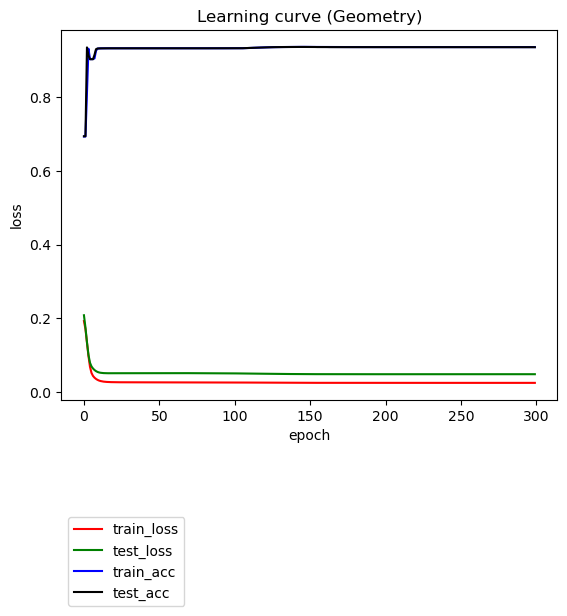


a_weight1: 
-0.4942238,-0.44646066,-0.4619281,-1.2009137,-0.5520075,0.60190696,-0.44057143,-0.9300643,-1.1852005,0.44341946,-1.6394073,-1.6592599,-1.7359452,-1.6747706,-1.5585438,1.7170956,-1.5453565,-1.8096927,-1.7781183,1.5948883,-1.0368524,-0.09476593,-0.680482,2.0099936,-1.0408032,1.5635912,-0.36867577,-2.7394533,-3.6579757,-0.1305134,-0.09028414,-0.9055324,-0.29725707,-4.829847,-0.14269313,-0.43035954,-0.69422543,1.0650403,1.4063447,1.323396,

a_bias1: 
1.3597258,1.1779181,1.3062432,1.2052305,1.3227687,-1.1104517,1.2894887,1.1152706,1.0888325,-1.3047765,

a_weight2: 
-2.0531278,-1.9574717,-1.9813257,-2.8519611,-1.9008535,2.434931,-1.9160799,-2.3830857,-2.6353679,2.5294714,

a_bias2: 
1.5345296,

In [1]:
import pandas as pd
import numpy as np
import os
from random import shuffle
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
from keras.utils.vis_utils import plot_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import argparse
import locale
import os

seed = 246

# model-compile parameter sets
model_metrics = 'acc'
epochs = 300
batchs = 128
splits = 0.2
lr        = 1e-5
input_dim = 4
opt = Adam(learning_rate=lr,weight_decay=1e-5/128)

concatenated_df=pd.read_csv("extraFeatures_Geo.csv", header=None)
XY = concatenated_df.values
for i in range(10):
    np.random.shuffle(XY)
X = XY[:,[0,1,5,6,8,9]]## 'MPD','CBF','CUD','OEF','CUC','FLM','PPS','Label','tempRDCost','bestRDCost'
Y = XY[:,[7]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=splits, random_state=seed)
cost=x_train[:,[input_dim,input_dim+1]]
x_train=x_train[:,0:input_dim]
x_test=x_test[:,0:input_dim]

model = Sequential()
inputShape=(input_dim,)
model.add(Input(shape=inputShape))
x = Dense(10,activation="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(model.output)
x = Dense(1,activation ="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(x)
model = Model(inputs=[model.input],outputs=x)
model.compile(loss="mse",optimizer=opt,metrics=['acc'])

y_train_flatten = y_train.flatten()
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_flatten), y=y_train_flatten)
class_weights = dict(zip(np.unique(y_train_flatten),class_weights))
# cost_max = np.max(cost[:,0])
# cost_min = np.min(cost[:,0])
# cost_average = np.average(cost[:,0])
# sample_weightss = np.array((cost[:,0]-cost_min)/(cost_max-cost_min))
# sample_weightss = np.array(cost[:,0]/cost_average)
sample_num=np.size(y_train,0)
cost_sum=0
cost_num=0
cost_difference = []
for sample in np.concatenate([cost,y_train],axis=1):
    cost_difference_value = sample[0]-sample[1]
    if (sample[2]==0)&(cost_difference_value!=0):
        cost_difference.append(0)
    elif (sample[2]==0)&(cost_difference_value==0):
        cost_difference.append(1)
    elif (sample[2]==1)&(cost_difference_value<=0):
        cost_difference.append(0)
    else:
        cost_difference.append(cost_difference_value)
        cost_sum+=cost_difference_value
        cost_num+=1
sample_weights = np.array(cost_difference)
cost_average=cost_sum/cost_num
for i in range(sample_num):
    if (y_train[i]==1)&(sample_weights[i]!=0):
        sample_weights[i]=sample_weights[i]/cost_average
    if sample_weights[i]>1:
        sample_weights[i]=1
    elif sample_weights[i]<0:
        sample_weights[i]=0

history = model.fit(x=[x_train],y=y_train, validation_data=([x_test], y_test), 
                    epochs=epochs, batch_size=batchs, class_weight=class_weights, sample_weight=sample_weights)

model.save_weights(r'revision/geo_model_noOEF_withsamplewight.h5')
eval_model=[]
eval_model.append(model.evaluate([x_test], y_test)[1])
print("\nTest Accuracy: %.4f" % eval_model[0])

plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='g')
plt.plot(history.history['acc'],color='b')
plt.plot(history.history['val_acc'],color='k')
plt.title('Learning curve (Geometry)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss','train_acc', 'test_acc'], loc='upper left',bbox_to_anchor=(0,-0.3))
plt.savefig('FeaturesPlots/P_GeoTrainingCurve.jpg', bbox_inches='tight', dpi=1280)
plt.show()

import pickle
with open('revision/geo_model_noOEF_withsamplewight.txt', 'wb') as file_txt:
    pickle.dump(history.history, file_txt)
    
np.set_printoptions(suppress=True)

a_weight1=model.get_weights()[0]
a_bias1=model.get_weights()[1]
a_weight2=model.get_weights()[2]
a_bias2=model.get_weights()[3]
# a_weight3=model.get_weights()[4]
# a_bias3=model.get_weights()[5]


print("\na_weight1: ")
for a in a_weight1:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias1: ")
for a in a_bias1:
        print(a,end=",")
        
print("\n\na_weight2: ")
for a in a_weight2:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias2: ")
for a in a_bias2:
        print(a,end=",")

Epoch 1/300
15354/15354 [==============================] - 20s 1ms/step - loss: 0.1932 - acc: 0.6895 - val_loss: 0.2081 - val_acc: 0.6943
Epoch 2/300
15354/15354 [==============================] - 19s 1ms/step - loss: 0.1730 - acc: 0.6941 - val_loss: 0.1770 - val_acc: 0.6943
Epoch 3/300
15354/15354 [==============================] - 19s 1ms/step - loss: 0.1431 - acc: 0.7237 - val_loss: 0.1419 - val_acc: 0.7830
Epoch 4/300
15354/15354 [==============================] - 19s 1ms/step - loss: 0.1105 - acc: 0.9095 - val_loss: 0.1109 - val_acc: 0.9409
Epoch 5/300
15354/15354 [==============================] - 19s 1ms/step - loss: 0.0832 - acc: 0.9400 - val_loss: 0.0888 - val_acc: 0.9329
Epoch 6/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0643 - acc: 0.9212 - val_loss: 0.0750 - val_acc: 0.9137
Epoch 7/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0523 - acc: 0.9123 - val_loss: 0.0664 - val_acc: 0.9125
Epoch 8/300
15354/15354 [=========

15354/15354 [==============================] - 16s 1ms/step - loss: 0.0247 - acc: 0.9399 - val_loss: 0.0457 - val_acc: 0.9394
Epoch 61/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0247 - acc: 0.9399 - val_loss: 0.0457 - val_acc: 0.9397
Epoch 62/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0247 - acc: 0.9401 - val_loss: 0.0457 - val_acc: 0.9397
Epoch 63/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0246 - acc: 0.9402 - val_loss: 0.0457 - val_acc: 0.9399
Epoch 64/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0246 - acc: 0.9404 - val_loss: 0.0457 - val_acc: 0.9399
Epoch 65/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0246 - acc: 0.9404 - val_loss: 0.0456 - val_acc: 0.9399
Epoch 66/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0246 - acc: 0.9405 - val_loss: 0.0456 - val_acc: 0.9401
Epoch 67/300
15354/15354 [==============

Epoch 119/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0245 - acc: 0.9416 - val_loss: 0.0454 - val_acc: 0.9411
Epoch 120/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0245 - acc: 0.9416 - val_loss: 0.0454 - val_acc: 0.9411
Epoch 121/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0245 - acc: 0.9416 - val_loss: 0.0454 - val_acc: 0.9411
Epoch 122/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0245 - acc: 0.9416 - val_loss: 0.0454 - val_acc: 0.9411
Epoch 123/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0245 - acc: 0.9416 - val_loss: 0.0454 - val_acc: 0.9411
Epoch 124/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0245 - acc: 0.9416 - val_loss: 0.0454 - val_acc: 0.9411
Epoch 125/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0245 - acc: 0.9416 - val_loss: 0.0454 - val_acc: 0.9411
Epoch 126/300
15354/

15354/15354 [==============================] - 17s 1ms/step - loss: 0.0244 - acc: 0.9417 - val_loss: 0.0454 - val_acc: 0.9412
Epoch 178/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0244 - acc: 0.9417 - val_loss: 0.0454 - val_acc: 0.9412
Epoch 179/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0244 - acc: 0.9417 - val_loss: 0.0454 - val_acc: 0.9412
Epoch 180/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0244 - acc: 0.9417 - val_loss: 0.0454 - val_acc: 0.9412
Epoch 181/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0244 - acc: 0.9417 - val_loss: 0.0454 - val_acc: 0.9412
Epoch 182/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0244 - acc: 0.9416 - val_loss: 0.0454 - val_acc: 0.9412
Epoch 183/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0244 - acc: 0.9417 - val_loss: 0.0454 - val_acc: 0.9412
Epoch 184/300
15354/15354 [=======

15354/15354 [==============================] - 17s 1ms/step - loss: 0.0244 - acc: 0.9417 - val_loss: 0.0454 - val_acc: 0.9412
Epoch 236/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0244 - acc: 0.9417 - val_loss: 0.0454 - val_acc: 0.9412
Epoch 237/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0244 - acc: 0.9417 - val_loss: 0.0454 - val_acc: 0.9412
Epoch 238/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0244 - acc: 0.9417 - val_loss: 0.0454 - val_acc: 0.9412
Epoch 239/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0244 - acc: 0.9417 - val_loss: 0.0454 - val_acc: 0.9412
Epoch 240/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0244 - acc: 0.9417 - val_loss: 0.0454 - val_acc: 0.9412
Epoch 241/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0244 - acc: 0.9417 - val_loss: 0.0454 - val_acc: 0.9412
Epoch 242/300
15354/15354 [=======

15354/15354 [==============================] - 16s 1ms/step - loss: 0.0244 - acc: 0.9417 - val_loss: 0.0454 - val_acc: 0.9412
Epoch 294/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0244 - acc: 0.9417 - val_loss: 0.0454 - val_acc: 0.9412
Epoch 295/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0244 - acc: 0.9417 - val_loss: 0.0454 - val_acc: 0.9412
Epoch 296/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0244 - acc: 0.9417 - val_loss: 0.0454 - val_acc: 0.9412
Epoch 297/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0244 - acc: 0.9417 - val_loss: 0.0454 - val_acc: 0.9412
Epoch 298/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0244 - acc: 0.9417 - val_loss: 0.0454 - val_acc: 0.9412
Epoch 299/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0244 - acc: 0.9417 - val_loss: 0.0454 - val_acc: 0.9412
Epoch 300/300
15354/15354 [=======

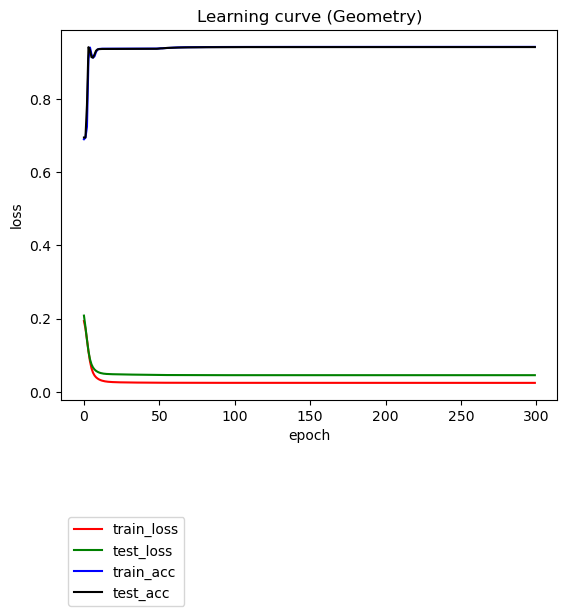


a_weight1: 
-0.50057477,-0.69561183,0.6557979,-0.9069935,-0.58719724,-0.67514414,-0.38725027,-0.35711756,-0.40938288,-0.88295764,-1.5031918,-1.5328213,1.4345624,-1.5027584,-1.4504861,-1.5741382,-1.6315821,-1.3586533,-1.4481329,-1.4298806,-1.0599743,-0.94445854,0.9389331,-0.63878417,-0.9841735,-0.84173447,-1.1468085,-1.2753092,-1.1883692,-0.7378931,-0.8369839,-1.169548,1.1504332,-1.6188565,-0.9758886,-1.1529994,-0.69221026,-0.6340284,-0.7102781,-1.5448472,

a_bias1: 
1.5543334,1.7350049,-1.6184772,1.50319,1.4922016,1.5412456,1.7252853,1.576176,1.6072465,1.571457,

a_weight2: 
-2.4581642,-2.5618098,3.760627,-2.3773313,-2.3336868,-2.4017785,-2.5993443,-2.435203,-2.5166948,-2.3974345,

a_bias2: 
2.7539406,

In [2]:
import pandas as pd
import numpy as np
import os
from random import shuffle
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
from keras.utils.vis_utils import plot_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import argparse
import locale
import os

seed = 246

# model-compile parameter sets
model_metrics = 'acc'
epochs = 300
batchs = 128
splits = 0.2
lr        = 1e-5
input_dim = 4
opt = Adam(learning_rate=lr,weight_decay=1e-5/128)

concatenated_df=pd.read_csv("extraFeatures_Geo.csv", header=None)
XY = concatenated_df.values
for i in range(10):
    np.random.shuffle(XY)
X = XY[:,[0,1,3,6,8,9]]## 'MPD','CBF','CUD','OEF','CUC','FLM','PPS','Label','tempRDCost','bestRDCost'
Y = XY[:,[7]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=splits, random_state=seed)
cost=x_train[:,[input_dim,input_dim+1]]
x_train=x_train[:,0:input_dim]
x_test=x_test[:,0:input_dim]

model = Sequential()
inputShape=(input_dim,)
model.add(Input(shape=inputShape))
x = Dense(10,activation="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(model.output)
x = Dense(1,activation ="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(x)
model = Model(inputs=[model.input],outputs=x)
model.compile(loss="mse",optimizer=opt,metrics=['acc'])

y_train_flatten = y_train.flatten()
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_flatten), y=y_train_flatten)
class_weights = dict(zip(np.unique(y_train_flatten),class_weights))
# cost_max = np.max(cost[:,0])
# cost_min = np.min(cost[:,0])
# cost_average = np.average(cost[:,0])
# sample_weightss = np.array((cost[:,0]-cost_min)/(cost_max-cost_min))
# sample_weightss = np.array(cost[:,0]/cost_average)
sample_num=np.size(y_train,0)
cost_sum=0
cost_num=0
cost_difference = []
for sample in np.concatenate([cost,y_train],axis=1):
    cost_difference_value = sample[0]-sample[1]
    if (sample[2]==0)&(cost_difference_value!=0):
        cost_difference.append(0)
    elif (sample[2]==0)&(cost_difference_value==0):
        cost_difference.append(1)
    elif (sample[2]==1)&(cost_difference_value<=0):
        cost_difference.append(0)
    else:
        cost_difference.append(cost_difference_value)
        cost_sum+=cost_difference_value
        cost_num+=1
sample_weights = np.array(cost_difference)
cost_average=cost_sum/cost_num
for i in range(sample_num):
    if (y_train[i]==1)&(sample_weights[i]!=0):
        sample_weights[i]=sample_weights[i]/cost_average
    if sample_weights[i]>1:
        sample_weights[i]=1
    elif sample_weights[i]<0:
        sample_weights[i]=0

history = model.fit(x=[x_train],y=y_train, validation_data=([x_test], y_test), 
                    epochs=epochs, batch_size=batchs, class_weight=class_weights, sample_weight=sample_weights)

model.save_weights(r'revision/geo_model_noFLM_withsamplewight.h5')
eval_model=[]
eval_model.append(model.evaluate([x_test], y_test)[1])
print("\nTest Accuracy: %.4f" % eval_model[0])

plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='g')
plt.plot(history.history['acc'],color='b')
plt.plot(history.history['val_acc'],color='k')
plt.title('Learning curve (Geometry)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss','train_acc', 'test_acc'], loc='upper left',bbox_to_anchor=(0,-0.3))
plt.savefig('FeaturesPlots/P_GeoTrainingCurve.jpg', bbox_inches='tight', dpi=1280)
plt.show()

import pickle
with open('revision/geo_model_noFLM_withsamplewight.txt', 'wb') as file_txt:
    pickle.dump(history.history, file_txt)
    
np.set_printoptions(suppress=True)

a_weight1=model.get_weights()[0]
a_bias1=model.get_weights()[1]
a_weight2=model.get_weights()[2]
a_bias2=model.get_weights()[3]
# a_weight3=model.get_weights()[4]
# a_bias3=model.get_weights()[5]


print("\na_weight1: ")
for a in a_weight1:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias1: ")
for a in a_bias1:
        print(a,end=",")
        
print("\n\na_weight2: ")
for a in a_weight2:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias2: ")
for a in a_bias2:
        print(a,end=",")

Epoch 1/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.1934 - acc: 0.6941 - val_loss: 0.2127 - val_acc: 0.6941
Epoch 2/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.1729 - acc: 0.7000 - val_loss: 0.1821 - val_acc: 0.7493
Epoch 3/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.1370 - acc: 0.9034 - val_loss: 0.1420 - val_acc: 0.9448
Epoch 4/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0994 - acc: 0.9187 - val_loss: 0.1066 - val_acc: 0.8981
Epoch 5/300
15354/15354 [==============================] - 18s 1ms/step - loss: 0.0714 - acc: 0.8968 - val_loss: 0.0825 - val_acc: 0.8967
Epoch 6/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0539 - acc: 0.8968 - val_loss: 0.0679 - val_acc: 0.9033
Epoch 7/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0436 - acc: 0.9185 - val_loss: 0.0595 - val_acc: 0.9321
Epoch 8/300
15354/15354 [=========

15354/15354 [==============================] - 15s 1ms/step - loss: 0.0239 - acc: 0.9450 - val_loss: 0.0435 - val_acc: 0.9454
Epoch 61/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0239 - acc: 0.9451 - val_loss: 0.0435 - val_acc: 0.9454
Epoch 62/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0239 - acc: 0.9451 - val_loss: 0.0435 - val_acc: 0.9455
Epoch 63/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0239 - acc: 0.9451 - val_loss: 0.0435 - val_acc: 0.9455
Epoch 64/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0239 - acc: 0.9451 - val_loss: 0.0435 - val_acc: 0.9456
Epoch 65/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0239 - acc: 0.9452 - val_loss: 0.0435 - val_acc: 0.9456
Epoch 66/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0239 - acc: 0.9452 - val_loss: 0.0435 - val_acc: 0.9456
Epoch 67/300
15354/15354 [==============

Epoch 119/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0238 - acc: 0.9454 - val_loss: 0.0436 - val_acc: 0.9458
Epoch 120/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0238 - acc: 0.9454 - val_loss: 0.0436 - val_acc: 0.9458
Epoch 121/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0238 - acc: 0.9454 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 122/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0238 - acc: 0.9454 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 123/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0238 - acc: 0.9454 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 124/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0238 - acc: 0.9454 - val_loss: 0.0436 - val_acc: 0.9458
Epoch 125/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0238 - acc: 0.9454 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 126/300
15354/

15354/15354 [==============================] - 16s 1ms/step - loss: 0.0238 - acc: 0.9455 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 178/300
15354/15354 [==============================] - 18s 1ms/step - loss: 0.0238 - acc: 0.9455 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 179/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0238 - acc: 0.9455 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 180/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0238 - acc: 0.9455 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 181/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0238 - acc: 0.9455 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 182/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0238 - acc: 0.9455 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 183/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0238 - acc: 0.9455 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 184/300
15354/15354 [=======

15354/15354 [==============================] - 16s 1ms/step - loss: 0.0238 - acc: 0.9455 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 236/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0238 - acc: 0.9455 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 237/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0238 - acc: 0.9455 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 238/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0238 - acc: 0.9455 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 239/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0238 - acc: 0.9455 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 240/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0238 - acc: 0.9455 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 241/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0238 - acc: 0.9455 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 242/300
15354/15354 [=======

15354/15354 [==============================] - 16s 1ms/step - loss: 0.0238 - acc: 0.9455 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 294/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0238 - acc: 0.9455 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 295/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0238 - acc: 0.9455 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 296/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0238 - acc: 0.9455 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 297/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0238 - acc: 0.9455 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 298/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0238 - acc: 0.9455 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 299/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0238 - acc: 0.9455 - val_loss: 0.0436 - val_acc: 0.9459
Epoch 300/300
15354/15354 [=======

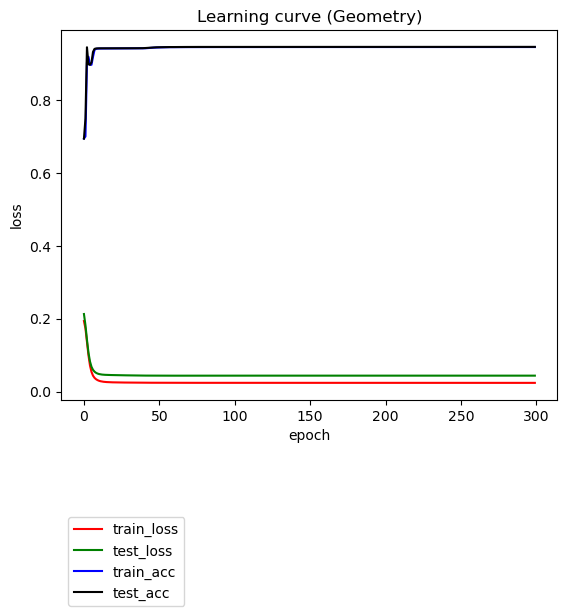


a_weight1: 
-0.80455256,0.3031507,-0.47928935,-0.5806617,-0.62186265,0.42176643,-0.98664474,0.6768777,-0.3701626,0.5802003,-1.4142972,1.1133622,-1.2387223,-1.3753422,-1.2757181,1.3010061,-1.4227165,1.3460217,-1.0670004,1.3287574,-0.53727096,1.0760974,-0.96269417,-0.8250807,-0.7754965,1.0192771,-0.35564744,0.6697327,-1.0161769,0.83291245,-1.4071016,0.4915112,-0.5835831,-0.7575397,-0.9695984,0.44173503,-2.140747,1.1277405,-0.6422484,0.72527415,

a_bias1: 
1.687396,-1.8737473,1.8302389,1.8469259,1.8458159,-1.8367783,1.6501355,-1.7968379,1.8915614,-1.776964,

a_weight2: 
-2.5078123,2.0677612,-2.555755,-2.5843408,-2.4479768,2.043091,-2.5709012,2.128886,-2.470867,2.0457191,

a_bias2: 
0.22681466,

In [3]:
import pandas as pd
import numpy as np
import os
from random import shuffle
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
from keras.utils.vis_utils import plot_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import argparse
import locale
import os

seed = 246

# model-compile parameter sets
model_metrics = 'acc'
epochs = 300
batchs = 128
splits = 0.2
lr        = 1e-5
input_dim = 4
opt = Adam(learning_rate=lr,weight_decay=1e-5/128)

concatenated_df=pd.read_csv("extraFeatures_Geo.csv", header=None)
XY = concatenated_df.values
for i in range(10):
    np.random.shuffle(XY)
X = XY[:,[0,1,3,5,8,9]]## 'MPD','CBF','CUD','OEF','CUC','FLM','PPS','Label','tempRDCost','bestRDCost'
Y = XY[:,[7]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=splits, random_state=seed)
cost=x_train[:,[input_dim,input_dim+1]]
x_train=x_train[:,0:input_dim]
x_test=x_test[:,0:input_dim]

model = Sequential()
inputShape=(input_dim,)
model.add(Input(shape=inputShape))
x = Dense(10,activation="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(model.output)
x = Dense(1,activation ="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(x)
model = Model(inputs=[model.input],outputs=x)
model.compile(loss="mse",optimizer=opt,metrics=['acc'])

y_train_flatten = y_train.flatten()
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_flatten), y=y_train_flatten)
class_weights = dict(zip(np.unique(y_train_flatten),class_weights))
# cost_max = np.max(cost[:,0])
# cost_min = np.min(cost[:,0])
# cost_average = np.average(cost[:,0])
# sample_weightss = np.array((cost[:,0]-cost_min)/(cost_max-cost_min))
# sample_weightss = np.array(cost[:,0]/cost_average)
sample_num=np.size(y_train,0)
cost_sum=0
cost_num=0
cost_difference = []
for sample in np.concatenate([cost,y_train],axis=1):
    cost_difference_value = sample[0]-sample[1]
    if (sample[2]==0)&(cost_difference_value!=0):
        cost_difference.append(0)
    elif (sample[2]==0)&(cost_difference_value==0):
        cost_difference.append(1)
    elif (sample[2]==1)&(cost_difference_value<=0):
        cost_difference.append(0)
    else:
        cost_difference.append(cost_difference_value)
        cost_sum+=cost_difference_value
        cost_num+=1
sample_weights = np.array(cost_difference)
cost_average=cost_sum/cost_num
for i in range(sample_num):
    if (y_train[i]==1)&(sample_weights[i]!=0):
        sample_weights[i]=sample_weights[i]/cost_average
    if sample_weights[i]>1:
        sample_weights[i]=1
    elif sample_weights[i]<0:
        sample_weights[i]=0

history = model.fit(x=[x_train],y=y_train, validation_data=([x_test], y_test), 
                    epochs=epochs, batch_size=batchs, class_weight=class_weights, sample_weight=sample_weights)

model.save_weights(r'revision/geo_model_noPPS_withsamplewight.h5')
eval_model=[]
eval_model.append(model.evaluate([x_test], y_test)[1])
print("\nTest Accuracy: %.4f" % eval_model[0])

plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='g')
plt.plot(history.history['acc'],color='b')
plt.plot(history.history['val_acc'],color='k')
plt.title('Learning curve (Geometry)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss','train_acc', 'test_acc'], loc='upper left',bbox_to_anchor=(0,-0.3))
plt.savefig('FeaturesPlots/P_GeoTrainingCurve.jpg', bbox_inches='tight', dpi=1280)
plt.show()

import pickle
with open('revision/geo_model_noPPS_withsamplewight.txt', 'wb') as file_txt:
    pickle.dump(history.history, file_txt)
    
np.set_printoptions(suppress=True)

a_weight1=model.get_weights()[0]
a_bias1=model.get_weights()[1]
a_weight2=model.get_weights()[2]
a_bias2=model.get_weights()[3]
# a_weight3=model.get_weights()[4]
# a_bias3=model.get_weights()[5]


print("\na_weight1: ")
for a in a_weight1:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias1: ")
for a in a_bias1:
        print(a,end=",")
        
print("\n\na_weight2: ")
for a in a_weight2:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias2: ")
for a in a_bias2:
        print(a,end=",")

Epoch 1/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.2444 - acc: 0.4521 - val_loss: 0.2433 - val_acc: 0.6671
Epoch 2/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.2179 - acc: 0.7156 - val_loss: 0.2157 - val_acc: 0.7256
Epoch 3/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.1791 - acc: 0.8455 - val_loss: 0.1772 - val_acc: 0.8741
Epoch 4/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.1416 - acc: 0.8778 - val_loss: 0.1401 - val_acc: 0.8790
Epoch 5/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.1110 - acc: 0.8803 - val_loss: 0.1106 - val_acc: 0.8798
Epoch 6/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0887 - acc: 0.8835 - val_loss: 0.0901 - val_acc: 0.8879
Epoch 7/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0742 - acc: 0.8972 - val_loss: 0.0769 - val_acc: 0.9008
Epoch 8/300
15354/15354 [=========

15354/15354 [==============================] - 16s 1ms/step - loss: 0.0425 - acc: 0.9289 - val_loss: 0.0464 - val_acc: 0.9286
Epoch 61/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0425 - acc: 0.9288 - val_loss: 0.0463 - val_acc: 0.9286
Epoch 62/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0425 - acc: 0.9290 - val_loss: 0.0465 - val_acc: 0.9280
Epoch 63/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0425 - acc: 0.9290 - val_loss: 0.0465 - val_acc: 0.9280
Epoch 64/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0425 - acc: 0.9289 - val_loss: 0.0465 - val_acc: 0.9280
Epoch 65/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0425 - acc: 0.9288 - val_loss: 0.0464 - val_acc: 0.9286
Epoch 66/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0425 - acc: 0.9290 - val_loss: 0.0463 - val_acc: 0.9286
Epoch 67/300
15354/15354 [==============

Epoch 119/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0424 - acc: 0.9293 - val_loss: 0.0464 - val_acc: 0.9286
Epoch 120/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0424 - acc: 0.9293 - val_loss: 0.0464 - val_acc: 0.9286
Epoch 121/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0424 - acc: 0.9293 - val_loss: 0.0463 - val_acc: 0.9287
Epoch 122/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0424 - acc: 0.9294 - val_loss: 0.0463 - val_acc: 0.9286
Epoch 123/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0424 - acc: 0.9293 - val_loss: 0.0463 - val_acc: 0.9301
Epoch 124/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0424 - acc: 0.9293 - val_loss: 0.0463 - val_acc: 0.9286
Epoch 125/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0424 - acc: 0.9295 - val_loss: 0.0464 - val_acc: 0.9286
Epoch 126/300
15354/

15354/15354 [==============================] - 16s 1ms/step - loss: 0.0424 - acc: 0.9293 - val_loss: 0.0463 - val_acc: 0.9301
Epoch 178/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0424 - acc: 0.9294 - val_loss: 0.0463 - val_acc: 0.9287
Epoch 179/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0424 - acc: 0.9295 - val_loss: 0.0463 - val_acc: 0.9287
Epoch 180/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0424 - acc: 0.9294 - val_loss: 0.0463 - val_acc: 0.9287
Epoch 181/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0424 - acc: 0.9293 - val_loss: 0.0463 - val_acc: 0.9287
Epoch 182/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0424 - acc: 0.9294 - val_loss: 0.0464 - val_acc: 0.9287
Epoch 183/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0424 - acc: 0.9294 - val_loss: 0.0464 - val_acc: 0.9287
Epoch 184/300
15354/15354 [=======

15354/15354 [==============================] - 16s 1ms/step - loss: 0.0424 - acc: 0.9297 - val_loss: 0.0464 - val_acc: 0.9287
Epoch 236/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0424 - acc: 0.9293 - val_loss: 0.0463 - val_acc: 0.9287
Epoch 237/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0424 - acc: 0.9295 - val_loss: 0.0463 - val_acc: 0.9287
Epoch 238/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0424 - acc: 0.9297 - val_loss: 0.0464 - val_acc: 0.9287
Epoch 239/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0424 - acc: 0.9295 - val_loss: 0.0464 - val_acc: 0.9287
Epoch 240/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0424 - acc: 0.9294 - val_loss: 0.0463 - val_acc: 0.9287
Epoch 241/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0424 - acc: 0.9296 - val_loss: 0.0463 - val_acc: 0.9287
Epoch 242/300
15354/15354 [=======

15354/15354 [==============================] - 16s 1ms/step - loss: 0.0424 - acc: 0.9293 - val_loss: 0.0462 - val_acc: 0.9302
Epoch 294/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0424 - acc: 0.9297 - val_loss: 0.0463 - val_acc: 0.9287
Epoch 295/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0424 - acc: 0.9295 - val_loss: 0.0464 - val_acc: 0.9287
Epoch 296/300
15354/15354 [==============================] - 17s 1ms/step - loss: 0.0424 - acc: 0.9293 - val_loss: 0.0462 - val_acc: 0.9287
Epoch 297/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0424 - acc: 0.9295 - val_loss: 0.0463 - val_acc: 0.9287
Epoch 298/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0424 - acc: 0.9294 - val_loss: 0.0463 - val_acc: 0.9287
Epoch 299/300
15354/15354 [==============================] - 16s 1ms/step - loss: 0.0424 - acc: 0.9294 - val_loss: 0.0462 - val_acc: 0.9287
Epoch 300/300
15354/15354 [=======

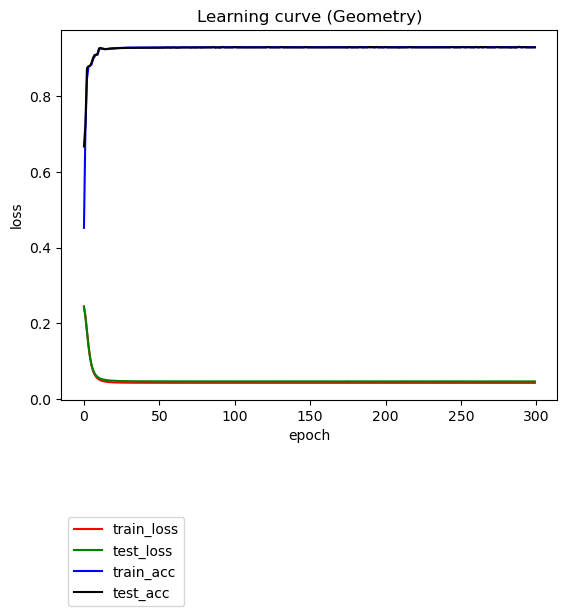


a_weight1: 
-0.67399067,0.50909793,0.022662448,0.9193549,0.2166787,-0.2100528,0.5129407,-0.21426986,0.41747746,-0.655299,-1.4519026,1.3726337,1.2068471,1.3610357,1.1309224,1.0691906,1.2752515,-1.24461,1.1794627,-1.3289676,-0.5625085,0.51934004,0.6719403,0.6085034,0.6793117,0.6224293,0.63876945,-0.59538275,0.7378121,-0.52657616,-0.46334982,0.39758855,0.33983263,0.29238543,0.43219027,0.48020673,0.40341502,-0.58985835,0.2685273,-0.41543847,-0.2607696,0.30327103,0.4064742,0.5654712,0.23225951,0.37771717,0.28177357,-0.07804623,0.41614693,-0.38725558,

a_bias1: 
1.9814434,-1.9140483,-2.1854274,-1.9624641,-1.9653329,-2.186319,-1.9529504,1.9731166,-1.9977309,1.9363022,

a_weight2: 
-2.4342096,1.4378068,1.5885017,1.555816,1.2161385,1.5132118,1.4034138,-2.3900192,1.3526103,-2.442052,

a_bias2: 
-1.0171825,

In [4]:
import pandas as pd
import numpy as np
import os
from random import shuffle
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
from keras.utils.vis_utils import plot_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import argparse
import locale
import os

seed = 246

# model-compile parameter sets
model_metrics = 'acc'
epochs = 300
batchs = 128
splits = 0.2
lr        = 1e-5
input_dim = 5
opt = Adam(learning_rate=lr,weight_decay=1e-5/128)

concatenated_df=pd.read_csv("extraFeatures_Geo.csv", header=None)
XY = concatenated_df.values
for i in range(10):
    np.random.shuffle(XY)
X = XY[:,[0,1,3,5,6,8,9]]## 'MPD','CBF','CUD','OEF','CUC','FLM','PPS','Label','tempRDCost','bestRDCost'
Y = XY[:,[7]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=splits, random_state=seed)
cost=x_train[:,[input_dim,input_dim+1]]
x_train=x_train[:,0:input_dim]
x_test=x_test[:,0:input_dim]

model = Sequential()
inputShape=(input_dim,)
model.add(Input(shape=inputShape))
x = Dense(10,activation="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(model.output)
x = Dense(1,activation ="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(x)
model = Model(inputs=[model.input],outputs=x)
model.compile(loss="mse",optimizer=opt,metrics=['acc'])

y_train_flatten = y_train.flatten()
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_flatten), y=y_train_flatten)
class_weights = dict(zip(np.unique(y_train_flatten),class_weights))
# cost_max = np.max(cost[:,0])
# cost_min = np.min(cost[:,0])
# cost_average = np.average(cost[:,0])
# sample_weightss = np.array((cost[:,0]-cost_min)/(cost_max-cost_min))
# sample_weightss = np.array(cost[:,0]/cost_average)
sample_num=np.size(y_train,0)
cost_sum=0
cost_num=0
cost_difference = []
for sample in np.concatenate([cost,y_train],axis=1):
    cost_difference_value = sample[0]-sample[1]
    if (sample[2]==0)&(cost_difference_value!=0):
        cost_difference.append(0)
    elif (sample[2]==0)&(cost_difference_value==0):
        cost_difference.append(1)
    elif (sample[2]==1)&(cost_difference_value<=0):
        cost_difference.append(0)
    else:
        cost_difference.append(cost_difference_value)
        cost_sum+=cost_difference_value
        cost_num+=1
sample_weights = np.array(cost_difference)
cost_average=cost_sum/cost_num
for i in range(sample_num):
    if (y_train[i]==1)&(sample_weights[i]!=0):
        sample_weights[i]=sample_weights[i]/cost_average
    if sample_weights[i]>1:
        sample_weights[i]=1
    elif sample_weights[i]<0:
        sample_weights[i]=0

history = model.fit(x=[x_train],y=y_train, validation_data=([x_test], y_test), 
                    epochs=epochs, batch_size=batchs, class_weight=class_weights)

model.save_weights(r'revision/geo_model_allFeatures_nosamplewight.h5')
eval_model=[]
eval_model.append(model.evaluate([x_test], y_test)[1])
print("\nTest Accuracy: %.4f" % eval_model[0])

plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='g')
plt.plot(history.history['acc'],color='b')
plt.plot(history.history['val_acc'],color='k')
plt.title('Learning curve (Geometry)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss','train_acc', 'test_acc'], loc='upper left',bbox_to_anchor=(0,-0.3))
plt.savefig('FeaturesPlots/P_GeoTrainingCurve.jpg', bbox_inches='tight', dpi=1280)
plt.show()

import pickle
with open('revision/geo_model_allFeatures_nosamplewight.txt', 'wb') as file_txt:
    pickle.dump(history.history, file_txt)
    
np.set_printoptions(suppress=True)

a_weight1=model.get_weights()[0]
a_bias1=model.get_weights()[1]
a_weight2=model.get_weights()[2]
a_bias2=model.get_weights()[3]
# a_weight3=model.get_weights()[4]
# a_bias3=model.get_weights()[5]


print("\na_weight1: ")
for a in a_weight1:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias1: ")
for a in a_bias1:
        print(a,end=",")
        
print("\n\na_weight2: ")
for a in a_weight2:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias2: ")
for a in a_bias2:
        print(a,end=",")